# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
table = soup.find("table")

data = []

for row in table.find_all("tr"):
    Table = [cell.text for cell in row.find_all("td")]
    data.append(Table)
    print(Table)
    #Table = html_soup.find_all('tr', class_='table')


[]
['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05'

In [6]:
rows = soup.find_all('tr', class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
Mars = []
# Loop through the scraped data to create a list of rows
# Extract all rows of data

for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td]
    Mars.append(row)


In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
Mars_List_df = pd.DataFrame(Mars, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])


In [9]:
# Confirm DataFrame was created successfully
Mars_List_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine the data type of each column
Mars_List_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [11]:
# Change data types for data analysis
Mars_List_df.terrestrial_date = pd.to_datetime(Mars_List_df.terrestrial_date)
Mars_List_df.sol = Mars_List_df.sol.astype('int')
Mars_List_df.ls = Mars_List_df.ls.astype('int')
Mars_List_df.month = Mars_List_df.month.astype('int')
Mars_List_df.min_temp = Mars_List_df.min_temp.astype('float')
Mars_List_df.pressure = Mars_List_df.pressure.astype('float')

In [12]:
# Confirm type changes were successful by examining data types again
print(Mars_List_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
num_months = Mars_List_df['month'].nunique()
print("Number of months on Mars:", num_months)

num_months = Mars_List_df['month'].value_counts().sort_index()
#Mars_List_df.sort_index()
print(num_months)

Number of months on Mars: 12
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [14]:
# 2. How many Martian days' worth of data are there?
num_martian_days = Mars_List_df['sol'].nunique()
print("Number of Martian days in the dataset:", num_martian_days)

Number of Martian days in the dataset: 1867


In [15]:
# 3. What is the average low temperature by month?
Mars_List_df['min_temp'] = Mars_List_df['min_temp'].astype(float)  # Convert min_temp column to float if not already done
monthly_avg_min_temp = Mars_List_df.groupby('month')['min_temp'].mean()
coldest_month = monthly_avg_min_temp.idxmin()
warmest_month = monthly_avg_min_temp.idxmax()
print("Coldest month on Mars:", coldest_month)
print("Warmest month on Mars:", warmest_month)
print(monthly_avg_min_temp)

Coldest month on Mars: 3
Warmest month on Mars: 8
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


Text(0.5, 1.0, 'Average Minimum Daily Temperature for Each Month on Mars')

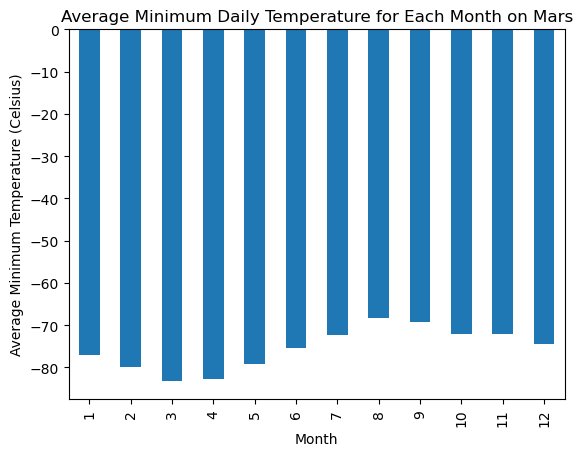

In [16]:
# Plot the average temperature by month
monthly_avg_min_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.title('Average Minimum Daily Temperature for Each Month on Mars')
#plt.show()

Coldest month on Mars: 3
Warmest month on Mars: 8


Text(0.5, 1.0, 'Average Minimum Daily Temperature for Each Month on Mars')

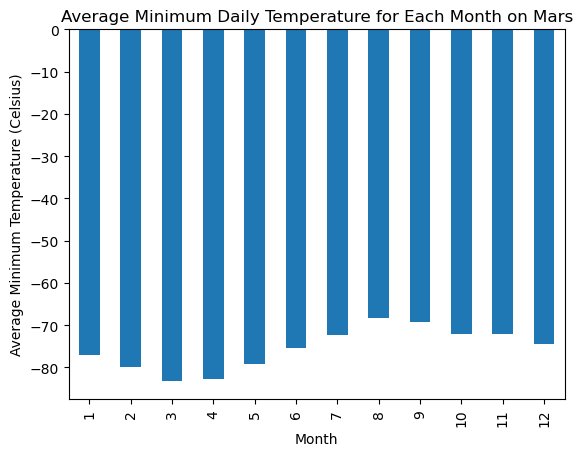

In [17]:
# Identify the coldest and hottest months in Curiosity's location
# What are the coldest and the warmest months on Mars?
Mars_List_df['min_temp'] = Mars_List_df['min_temp'].astype(float)  # Convert min_temp column to float if not already done
monthly_avg_min_temp = Mars_List_df.groupby('month')['min_temp'].mean()
coldest_month = monthly_avg_min_temp.idxmin()
warmest_month = monthly_avg_min_temp.idxmax()
print("Coldest month on Mars:", coldest_month)
print("Warmest month on Mars:", warmest_month)

# Plot the average minimum daily temperature for all months
monthly_avg_min_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.title('Average Minimum Daily Temperature for Each Month on Mars')
#plt.show()

In [18]:
# 4. Average pressure by Martian month
terrestrial_days_in_martian_year = num_martian_days / num_months
monthly_avg_pressure = Mars_List_df.groupby('month')['pressure'].mean()
#print("Approximate number of terrestrial days in a Martian year:", terrestrial_days_in_martian_year)
print(monthly_avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


Month with the lowest atmospheric pressure on Mars: 6
Month with the highest atmospheric pressure on Mars: 9


Text(0.5, 1.0, 'Average Daily Atmospheric Pressure for Each Month on Mars')

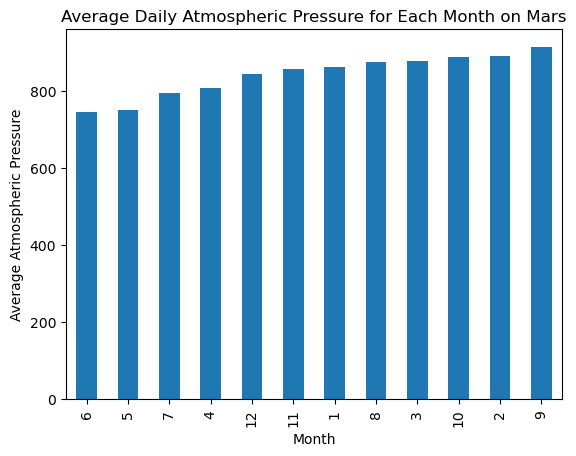

In [19]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
Mars_List_df['pressure'] = Mars_List_df['pressure'].astype(float)  # Convert pressure column to float if not already done
monthly_avg_pressure = Mars_List_df.groupby('month')['pressure'].mean()
lowest_pressure_month = monthly_avg_pressure.idxmin()
highest_pressure_month = monthly_avg_pressure.idxmax()
print("Month with the lowest atmospheric pressure on Mars:", lowest_pressure_month)
print("Month with the highest atmospheric pressure on Mars:", highest_pressure_month)

# Plot the average daily atmospheric pressure for all months
monthly_avg_pressure.sort_values().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Daily Atmospheric Pressure for Each Month on Mars')
#plt.show()

Text(0.5, 1.0, 'Daily Minimum Temperature on Mars')

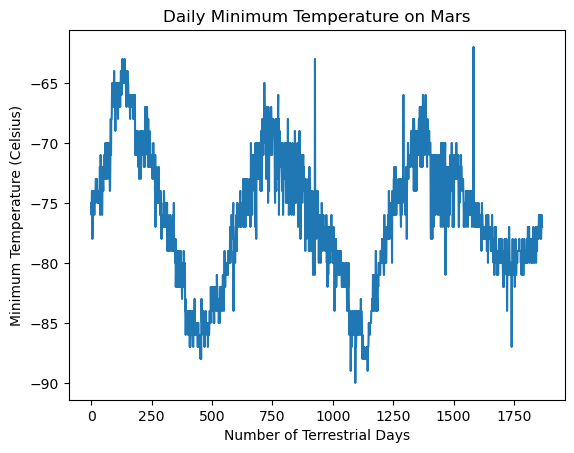

In [20]:
Mars_List_df.min_temp.plot()
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Daily Minimum Temperature on Mars')

Text(0.5, 1.0, 'Daily Minimum Temperature on Mars')

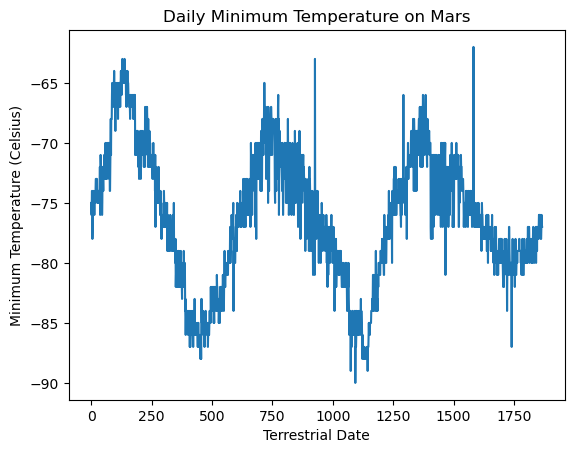

In [21]:
# 5. How many terrestrial (earth) days are there in a Martian year?
Mars_List_df.min_temp.plot()
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Daily Minimum Temperature on Mars')
#plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
Mars_List_df.to_csv('data.csv', index=False)

In [24]:
data_csv = pd.read_csv("data.csv")
data_csv.head

<bound method NDFrame.head of         id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]>

In [25]:
browser.quit()